# Защита персональных данных клиентов

**Описание компании:** ООО «Хоть потоп» занимается страховкой своих клиентов и видит свое дальнейшее развитие через заботу о своих клиентах и своевременного анализа данных своего бизнеса.

**Цель:** Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы, чтобы защитить данные клиентов страховой компании «Хоть потоп».

**Задача:** Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

### Импортируем нужные библиотеки

In [1]:
# импортируем нужные библиотеки и будем обращаться к ним через принятные сокращения
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as plt
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set()

### Через конструкцию try-except прочтем файл и сохраним ее в переменную df

In [2]:
# через конструкцию try-except прочтем файл и сохраним ее в переменную df
try:
    df = pd.read_csv("/datasets/insurance.csv")
except FileNotFoundError:
    print("FileNotFoundError: Проверьте корректность пути к файлу или наличие самого файла в каталоге!")

### Выведем первые 5 строк 

In [3]:
# выведем первые 5 строк 
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


### Приведем к коретному типу данных признак "Возраст"

In [4]:
df['Возраст'] = df['Возраст'].astype('int64')

### Выведем информацию об признаках, кол-ве ненулевых значений и типах данных

In [5]:
# выведем информацию об признаках, кол-ве ненулевых значений и типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   int64  
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


### Визуализируем признаки, чтобы увидеть и проанализировать потенциальные особенности

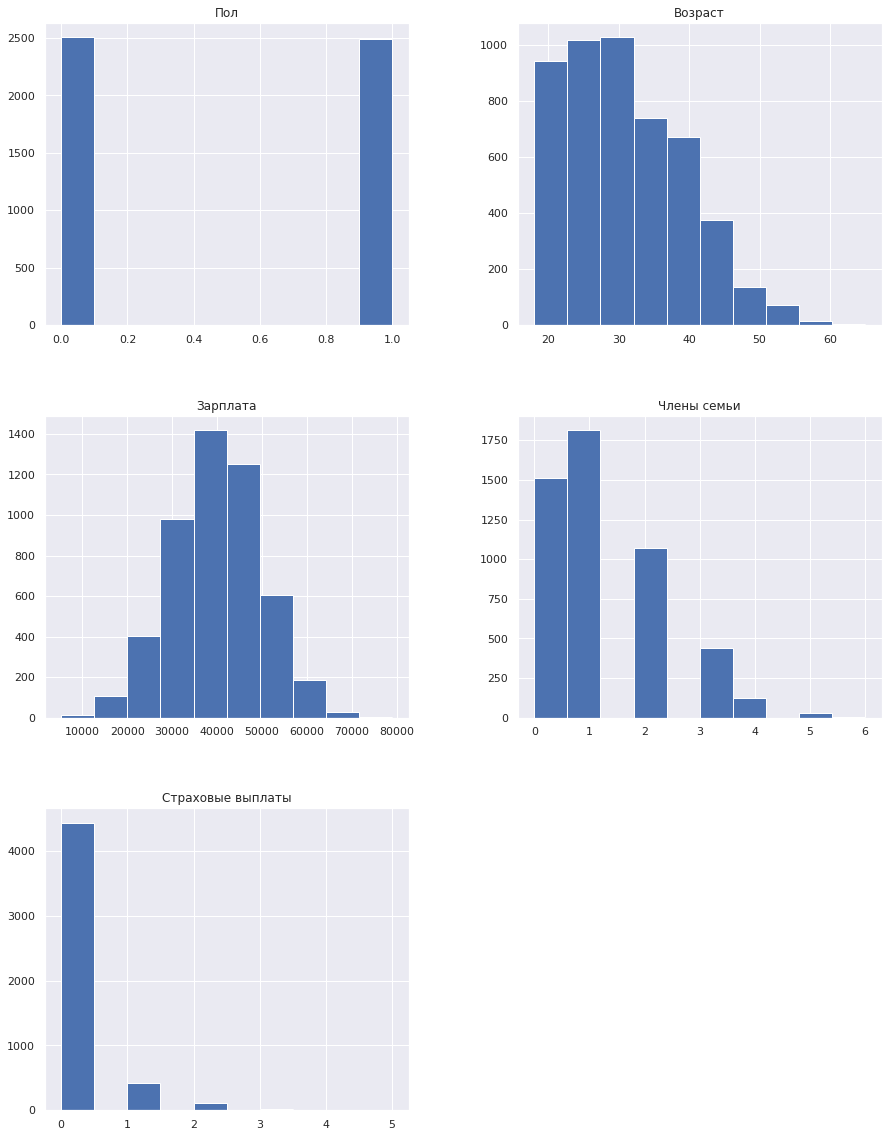

In [6]:
# визуализируем признаки, чтобы увидеть и проанализировать потенциальные особенности
df.hist(figsize=(15, 20));

### Посмотрим, в каком процентном соотношении приходится на каждое значение в столбце-признаке: "Страховые выплаты"

In [7]:
df['Страховые выплаты'].value_counts()/df['Страховые выплаты'].shape[0] 

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

### Применим через цикл другой способ визуализации наших признаков

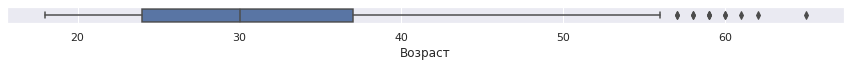

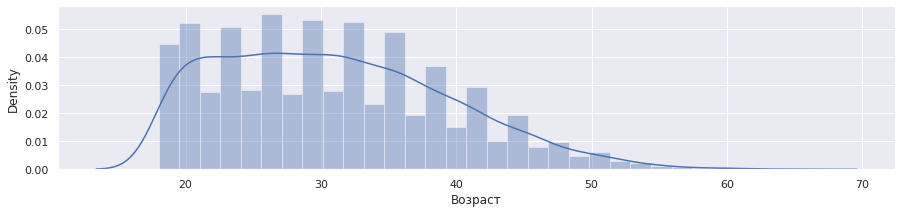

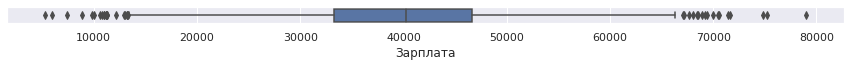

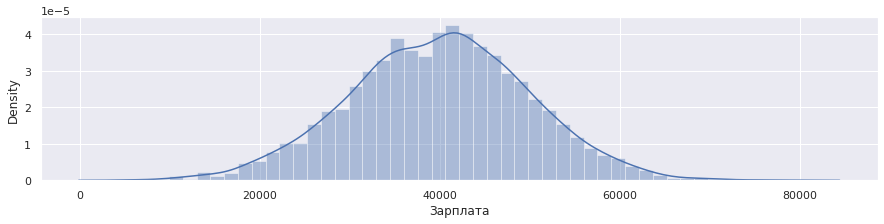

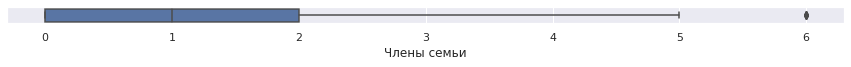

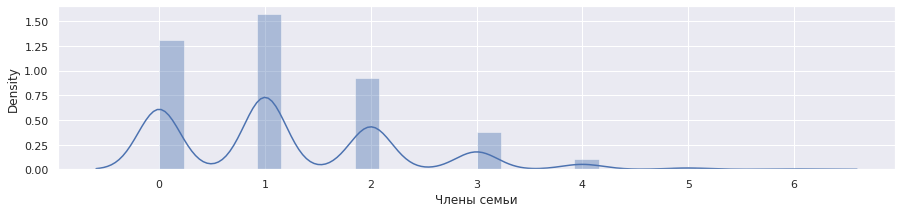

In [8]:
for i in df.iloc[:,[1,2,3]].columns:
    plt.figure(figsize=(15,.3))
    sns.boxplot(df[i])
    plt.show()
    plt.figure(figsize=(15,3))
    sns.distplot(df[i])
    plt.show()

### Переименуем наши столбцы (признаки) в соотвествии с принятым стандратом

In [9]:
df.columns = ['male', 'age', 'salary', 'family_members', 'insurance_payment']
df.head()

,male,age,salary,family_members,insurance_payment
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0


### Выводы по загрузке и первичному анализу данных:

1. Количество полов (женский, мужской) у нас практически равное - возможное причина этого в том, что данные были либо специально подготовленны, либо количество данных не достаточное чтобы были отличия (5000 объектов у нас в датасете)
2. Возраст показывает, что большинство клиентов люди от 18 до 32 (молодые люди) - что вполне реально в жизни и характеризует портрет потенциальных клиентов 
3. Видем, что у зарплаты график имеет нормальное распределение и его медиана лежит в 40,000
4. Увидели, что члены семьи и страховые выплаты похожи на дискретное распредление, и следующий признак имеет меньшее количество, чем предыдущий - например кол-во страховых выплат равное 0 намного больше, чем у 1
5. Нет пустых значений и пропусков - что очень хорошо, и нет необходимости проводить преобработку по этому критерию
6. Имена столбцов у нас идут без змеиного регистра и с заглавной буквы - что по правилам оформления не верно - потому и исправили

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответим на вопрос ниже и обоснуем решение.**

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.). Есть два варианта:**

    a. Изменится. Приведем примеры матриц.
    b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

### Указание, как связаны параметры линейной регрессии в исходной задаче и в преобразованной

**Ответ:** Не измениться

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$


\
Требуется доказать, что предсказания не изменятся, имеем  $a =  Xw$,   $a' = X'w'$
\
\
Доказательство:
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$



**Доказательство через выводимые свойства:**

$$
w' = ((XP)^T (XP))^{-1}(XP)^Ty = (P^T X^T XP)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} P^{T-1} P^T X^Ty
$$ 
\
$$
где:   P^{T-1} P^T = E
$$
$$
тогда:    w' = P^{-1} * [(X^T X)^{-1} X^T y] = P^{-1} w
$$

**Конечное доказательство:**

$$
a' = XP * w' = XPP^{-1}w = XEw = Xw = a
$$

### Создание обратимой матрицы

In [10]:
# Зададим матрицу, на которую умножаются признаки - P
loc = np.random.randint(2,100)
std = np.random.randint(2,100)
P = np.random.normal(loc, std, size=(5, 5))
P

array([[ 160.95893815,  -80.12374478,  -98.4117378 ,   29.72987189,
         101.27995231],
       [  24.76474051,   45.12995966,  -83.42486782,  -51.83120868,
         -27.28957531],
       [  36.5350356 ,  165.33920514,  119.48384418,  141.51932643,
         137.22252968],
       [-105.04355971,   39.51612327,  116.16797365,   81.8643003 ,
          56.17156702],
       [ 188.65607152,  -83.99502401,  -59.2499766 ,  124.40553611,
          58.2074867 ]])

### Проверка на обратимость

In [11]:
# Проверка на обратимость
np.linalg.inv(P)

array([[-1.51285025e-03, -9.28786201e-03,  4.73417203e-03,
        -1.29953344e-02, -3.42003662e-04],
       [-2.34913562e-03,  6.29179027e-03,  3.41149600e-03,
        -1.00072277e-03, -3.95364304e-05],
       [-1.94660968e-03, -1.75327119e-02,  4.82595088e-03,
        -1.26411778e-02, -4.01086119e-03],
       [-4.87925325e-03,  1.01062924e-02, -2.91420511e-03,
         1.09720395e-02,  9.50985763e-03],
       [ 9.96026890e-03, -2.64585661e-04,  7.19823488e-04,
         4.35718973e-03, -6.17656224e-03]])

### Разделим признаки и целевой признак

In [12]:
# разделим признаки и целевой признак 
X = df.drop(['insurance_payment'], axis=1)
Y = df['insurance_payment']

### Проверка корретности размерности P и X матриц

In [13]:
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [14]:
P.shape

(5, 5)

In [15]:
X.shape

(5000, 5)

### Создание новой матрицы: N

In [16]:
N = X @ P
N

array([[-5208288.2452481 ,  1966659.63299754,  5766589.24405191,
         4066373.89155578,  2791868.04579354],
       [-3989625.04221157,  1509054.16908389,  4419721.5938047 ,
         3117507.43589495,  2140991.27058042],
       [-2204694.27887249,   834553.30196062,  2442894.06638614,
         1723284.0966777 ,  1183683.64074196],
       ...,
       [-3559707.70226775,  1342655.24930237,  3940267.07191579,
         2778308.70770612,  1907178.2675116 ],
       [-3433368.93973634,  1295527.71471937,  3800961.79638015,
         2680427.16032419,  1840077.75005786],
       [-4263371.16334959,  1608865.11386371,  4719524.19123069,
         3327755.43759533,  2284540.04972387]])

### Проверка корретности размерности новой матрицы

In [17]:
N.shape

(5000, 5)

## Алгоритм преобразования

### Шаги алгоритма

1. Для шифрования воспользуемся квадратной обратимой матрицей - P , 

   где: N = X * P процесс шифрования, 

   а: N * P^-1 = X 
   

2. Возможность использования матрицы для шифрования исходной матрицы признаков была описана и обоснована в пункте 2 (выше)

## Проверка алгоритма

**Будем сравнивать две метрики качества MSE и R2_SCORE**

In [18]:
X = df.drop(['insurance_payment'], axis=1)
Y = df['insurance_payment']

In [19]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [20]:
model = LinearRegression()
model.fit(X, Y)
predicted = pd.Series(model.predict(X))
r2_without_cripto = r2_score(Y, predicted)

# Модель для шифрования
model_cripto = LinearRegression()

# Шифрование
loc = np.random.randint(2,100)
std = np.random.randint(2,100)
P = np.random.normal(loc, std, size=(4,4)).astype('int64')
X_cripto = pd.DataFrame(data = X.values@P, columns = X.columns)

# Проверка на шифрованных данных
model_cripto.fit(X_cripto, Y)
predicted_cripto = pd.Series(model_cripto.predict(X_cripto))
r2_with_cripto = r2_score(Y, predicted)

print("Качество без умножения на обратимую матрицу:", r2_without_cripto)
print("Качество с умножением на обратимую матрицу:", r2_with_cripto)

Качество без умножения на обратимую матрицу: 0.42494550286668
Качество с умножением на обратимую матрицу: 0.42494550286668


**Проверили изменения качества линейной регрессии: качество не поменялось**

### Выводы по проверке алгоритма и метрики качества r2_score:

1. Качество не отличается до и после преобразования. 
2. Метрика r2_score равняется 0.42494550286668. 
3. Предыдущие шаги описывали планируемый алгоритм работы и в данном (настоящем) пункте алгоритм был реализован и проверен

****

## Конечные выводы

**1.Выводы по загрузке и первичному анализу данных:**

1. Количество полов (женский, мужской) у нас практически равное - возможное причина этого в том, что данные были либо специально подготовленны, либо количество данных не достаточное чтобы были отличия (5000 объектов у нас в датасете)
2. Возраст показывает, что большинство клиентов люди от 18 до 32 (молодые люди) - что вполне реально в жизни и характеризует портрет потенциальных клиентов 
3. Видем, что у зарплаты график имеет нормальное распределение и его медиана лежит в 40,000
4. Увидели, что члены семьи и страховые выплаты похожи на дискретное распредление, и следующий признак имеет меньшее количество, чем предыдущий - например кол-во страховых выплат равное 0 намного больше, чем у 1
5. Нет пустых значений и пропусков - что очень хорошо, и нет необходимости проводить преобработку по этому критерию
6. Имена столбцов у нас идут без змеиного регистра и с заглавной буквы - что по правилам оформления не верно - потому и исправили в соотвествии с принятым стандратом

**2. Указание, как связаны параметры линейной регрессии в исходной задаче и в преобразованной:**

**Ответ:** Не измениться

**Обоснование:** 

$$
w' = ((XP)^T (XP))^{-1}(XP)^Ty = (P^T X^T XP)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} P^{T-1} P^T X^Ty
$$ 
\
$$
где:   P^{T-1} P^T = E
$$
$$
тогда:    w' = P^{-1} * [(X^T X)^{-1} X^T y] = P^{-1} w
$$
\
$$
a' = XP * w' = XPP^{-1}w = XEw = Xw = a
$$

**3. Подробно описан алгоритм:**

1. Для шифрования воспользуемся квадратной обратимой матрицей - P , 

   где: N = X * P процесс шифрования, 

   а: N * P^-1 = X 
   

2. Возможность использования матрицы для шифрования исходной матрицы признаков была описана и обоснована в пункте 2 (выше)


**4. Выводы по проверке алгоритма и метрики качества r2_score:**

1. Качество не отличается до и после преобразования. 
2. Метрика r2_score равняется 0.42494550286668. 
3. Предыдущие шаги описывали планируемый алгоритм работы и в данном (настоящем) пункте алгоритм был реализован и проверен